Quantopian

In [ ]:
def initialize(context):
    context.aapl = sid(24)
    
def handle_data(context,data):
    
    # prices for aapl for the last 50 days, in 1 day intervals
    hist = data.history(context.aapl,'price', 50, '1d')
    
    # mean of the entire 50 day history
    sma_50 = hist.mean()
    
    # mean of just the last 50 days
    sma_20 = hist[-20:].mean()

Our plan is to create a simple moving average crossover strategy, and we're almost ready. The logic should be simple: If the 20 SMA is greater than the 50 SMA, then the price is rising, and we want in on that action! If the 20 SMA is less than the 50 SMA, then price is falling, and we want to short (bet against) the company. Let's build an ordering system to reflect this:

In [ ]:
    if sma_20 > sma_50:
        order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        order_target_percent(context.aapl, -1.0)

The order_target_percent function is used to allow us to invest a certain percentage of our portfolio value into a company. In this case, the only company we're even consider is Apple (AAPL), so we're using 1.0 (100%). There are many methods for ordering, this is just one of them. We can do market orders, order specific dollar amounts, order percents, order a target value, and of course cancel pending orders. We're expecting to simply buy/sell 100% of our shares at each step in this case. If we run this, we get:

In [ ]:
    record(leverage = context.account.leverage)
#The first step is to pretty much always record leverage. Let's do that now:

Okay, so we're over leveraged. What actually happened? Well, for one, this handle_data function is being run every single minute. Thus, every minute, we can be plausibly ordering, and, in this case, that's ordering 100% of our portfolio's value. We think we're safe, because we're ordering a target percentage. If the target percentage is 100%, how are we winding up with so much more? The problem is, it can take time for orders to actually fill. Thus, as one order is waiting to be filled, others are being made at the same time!

The first thing we might want to do to avoid this, is to use the get_open_orders() method, as follows:

In [ ]:
    open_orders = get_open_orders()
    
    if sma_20 > sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, -1.0)

https://www.quantopian.com/help

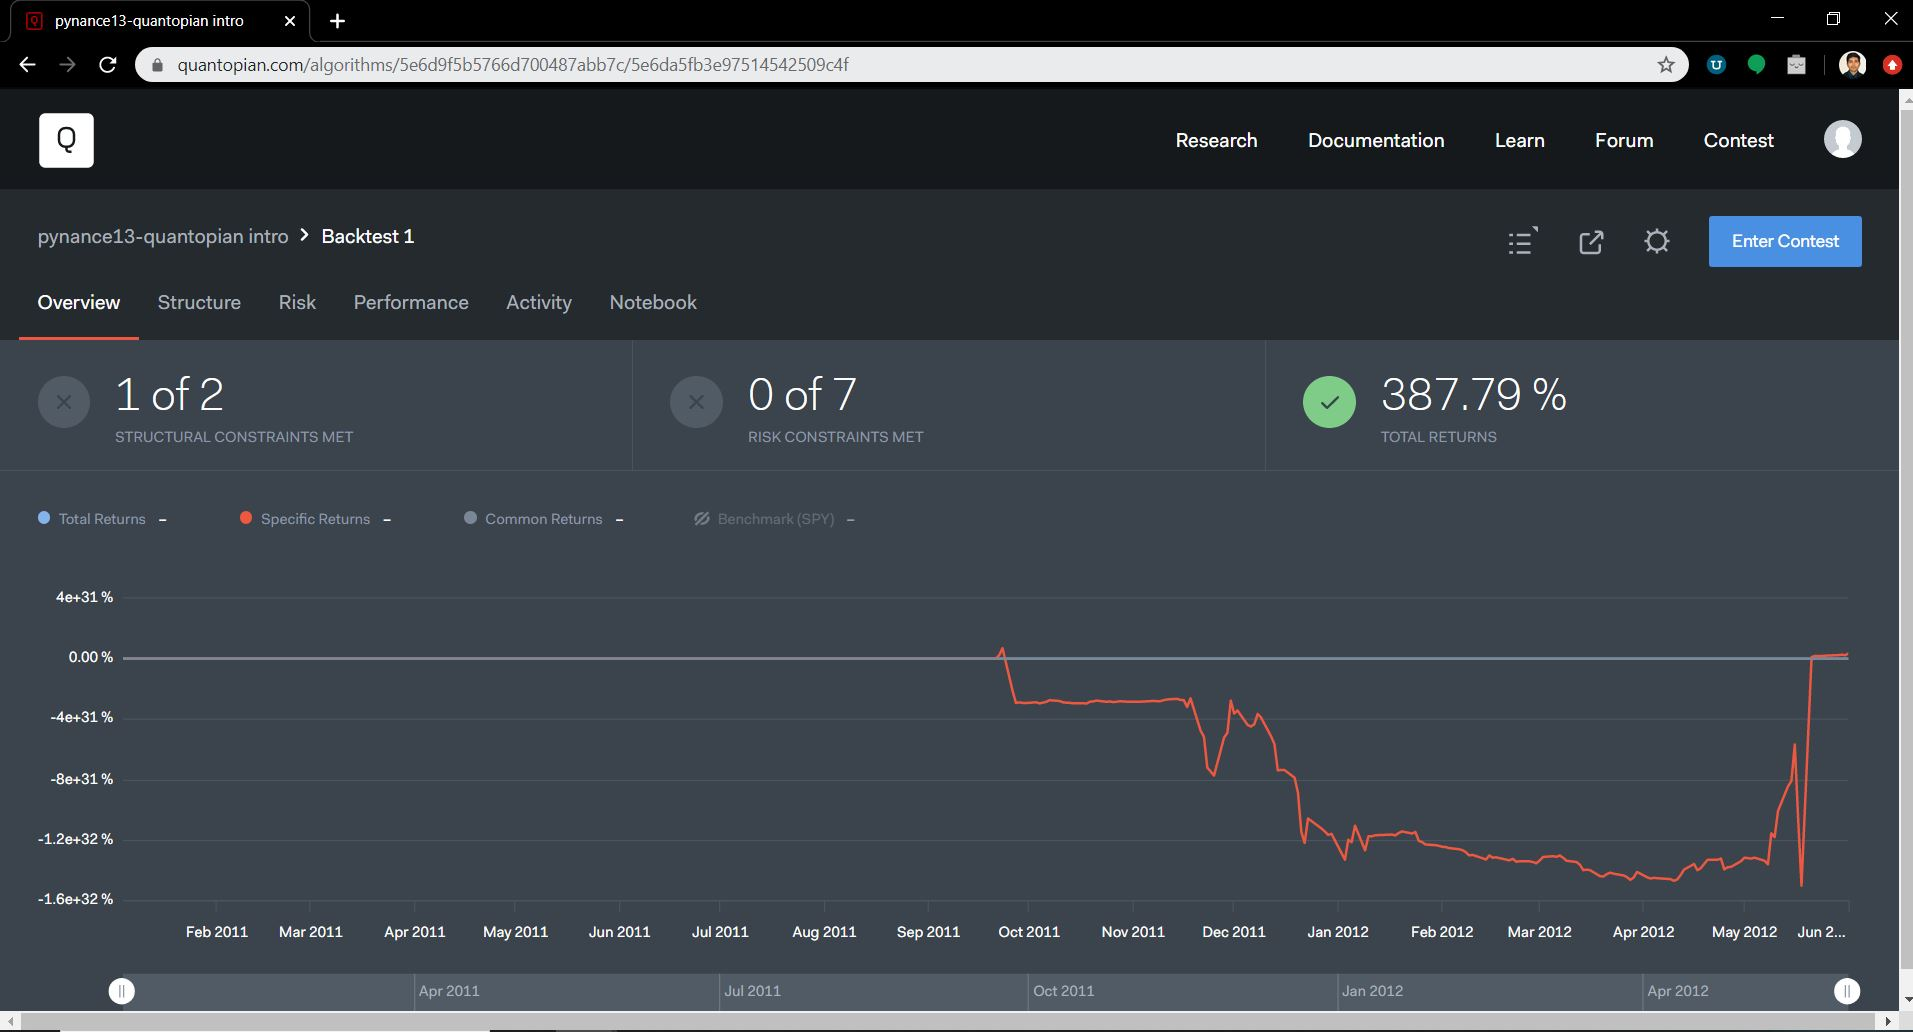

In [1]:
from IPython.display import Image
Image("pynance13 quantopian run.jpg")

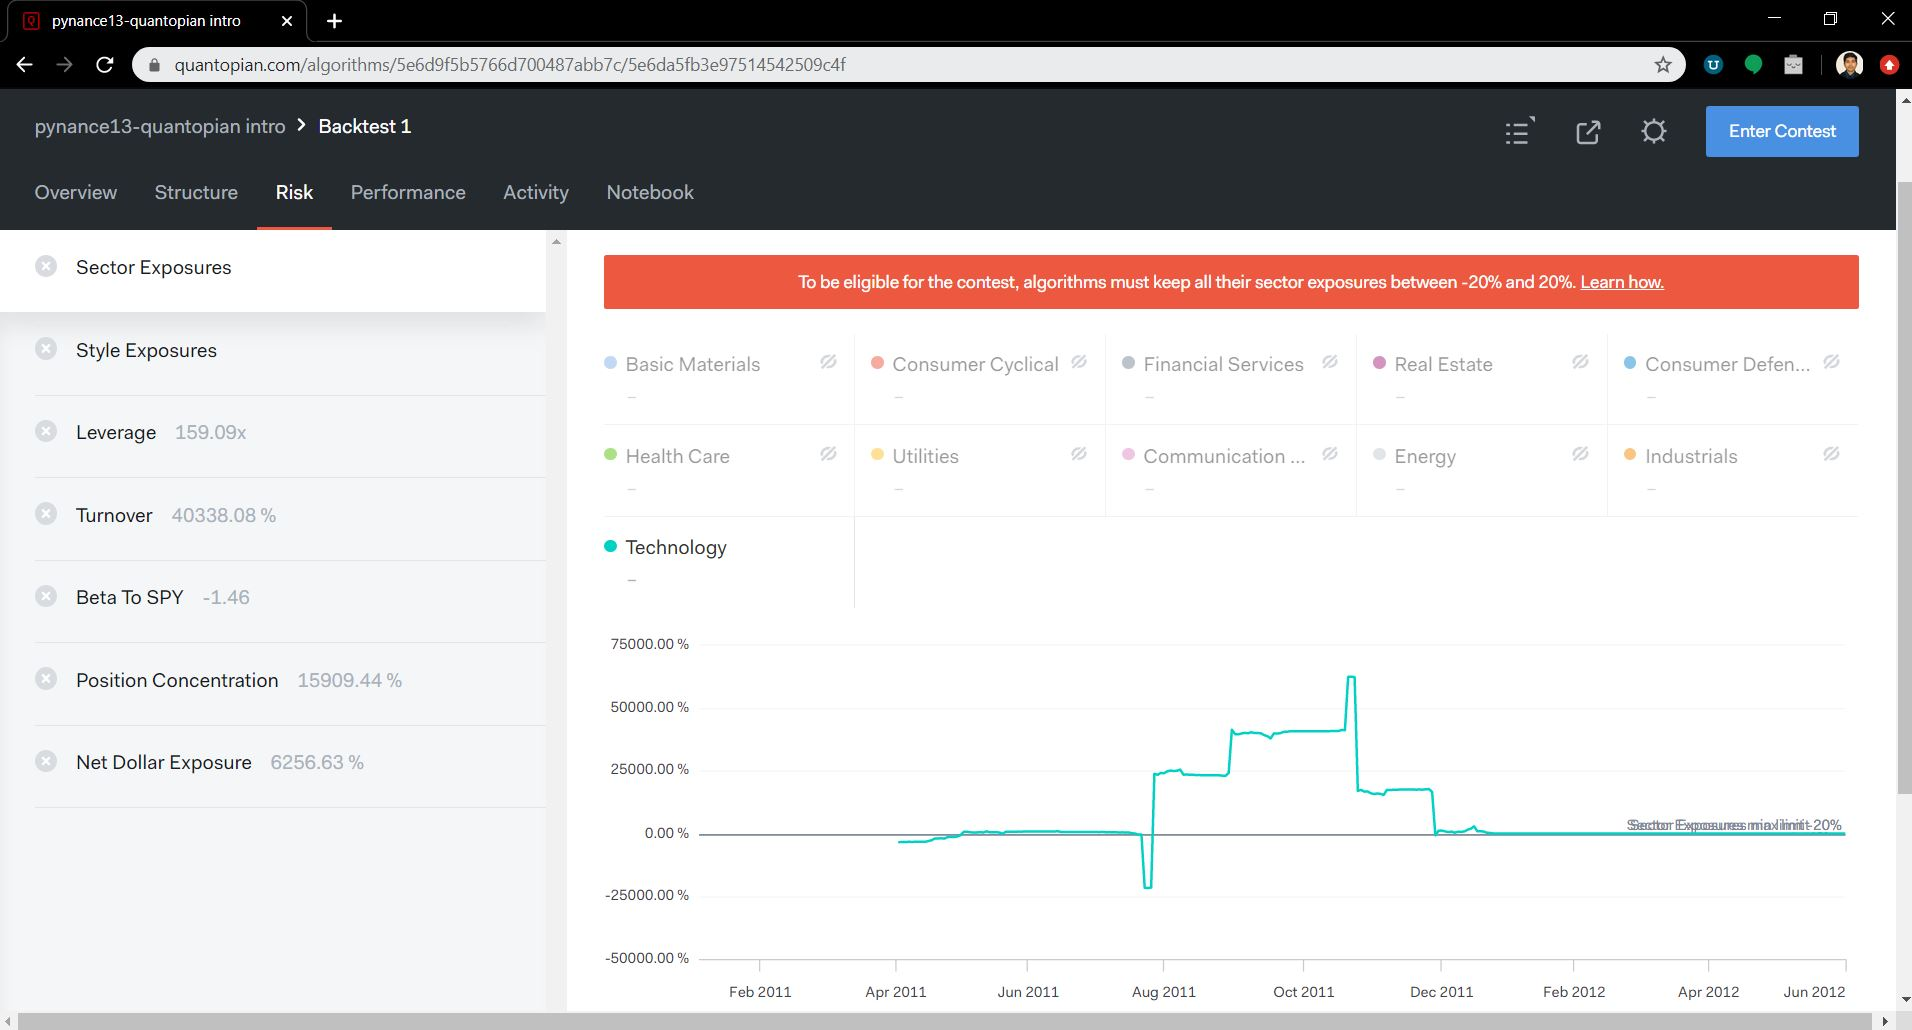

In [2]:
Image("pynance13 quantopian risk.jpg")

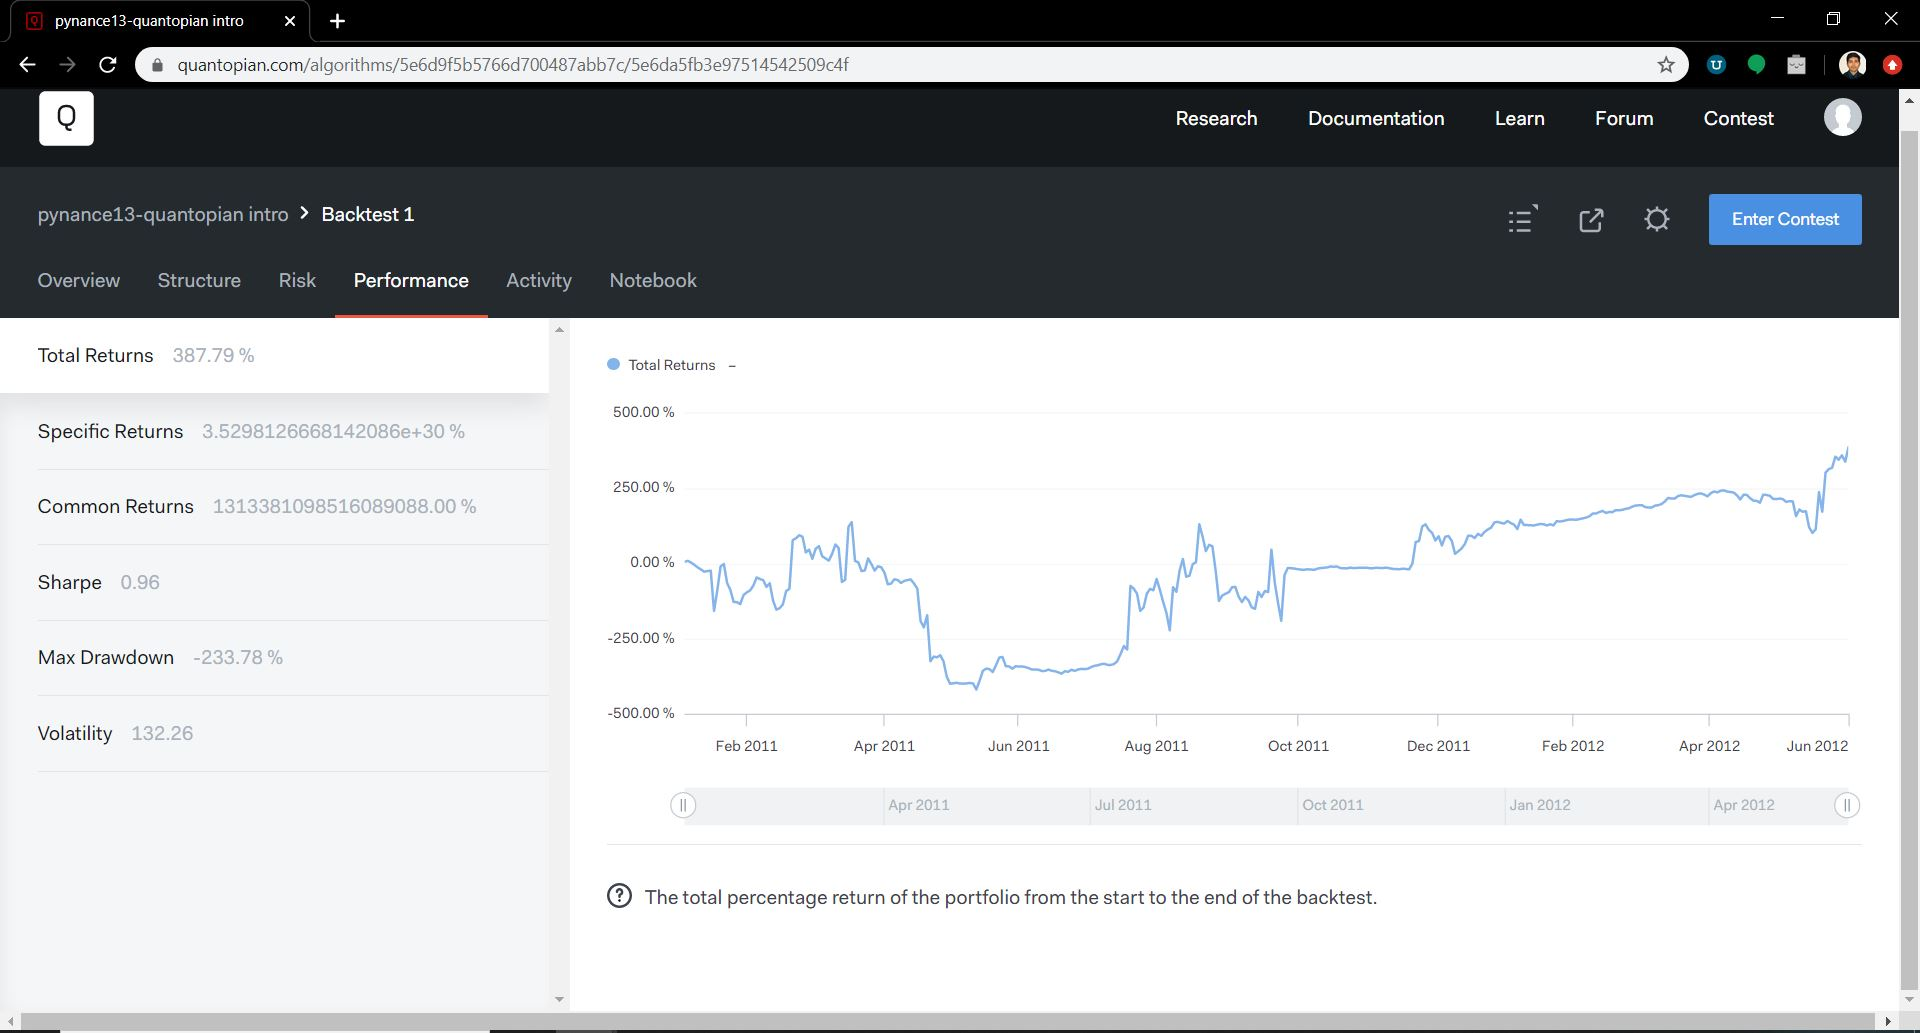

In [3]:
Image("pynance13 quantopian performance.jpg")